In [15]:
function compute_Hk(A,q,kmax)
    H = zeros(kmax, kmax)
    r = copy(q[:,1])
    q[:,1] = r / norm(r)
    
    for k = 1:kmax
        if k > 1
            q[:,k] = r / H[k,k-1]
        end

        r = A * q[:,k] # Multiply by A
        for i=1:k
            # Make vector orthogonal
            H[i,k] = dot(q[:,i], r)
            r -= H[i,k] * q[:,i]
        end

        if k<kmax
            H[k+1,k] = norm(r)
        end
    end
    return H
end

function eig_k(H,k)
    Hk = H[1:k,1:k]
    L, = eig(Hk) # Eigenvalue estimates at step k        
    return L    
end

eig_k (generic function with 1 method)

In [16]:
n = 128
srand(2016)

# Case 1
nh = div(n,2)
@assert 2*nh == n
θ = 2*π*rand(nh)
D = sqrt(rand(nh)) .* (cos(θ) + sin(θ)*im)
D = [D;conj(D)]
X = rand(n,nh) + rand(n,nh)*im
X = hcat(X,conj(X))

# Case 2
# X = rand(n,n)
# D = cos(linspace(0,π,n))

A = real( X * diagm(D) / X )

kmax = n # Size of Arnoldi space

q = zeros(n,kmax)
# Random starting vector
q[:,1] = rand(n)
q[:,1] /= norm(q[:,1])

Hk = compute_Hk(A,q,kmax);

In [17]:
function lt(z1,z2)
    if abs( abs(z1)-abs(z2) ) > eps(Float32) * (abs(z1) + abs(z2))
        return abs(z1) < abs(z2)
    elseif abs( real(z1-z2) ) > eps(Float32) * (abs(z1) + abs(z2))
        return real(z1) < real(z2)
    else
        return imag(z1) < imag(z2)
    end
end

lt (generic function with 1 method)

In [18]:
# Testing accuracy
D, = eig(A); D1, = eig(Hk)
sort!(D, lt=lt); sort!(D1, lt=lt)
@show norm(D-D1) / norm(D)

norm(D - D1) / norm(D) = 1.3984670203882842e-13


1.3984670203882842e-13

Interact.Slider{Int64}(Signal{Int64}(64, nactions=0),"k",64,1:128,"d",true)


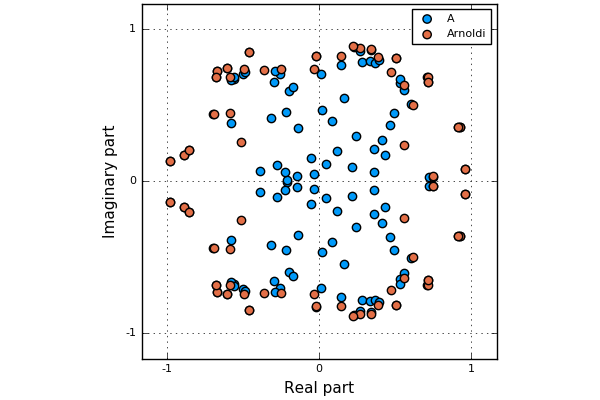

In [19]:
using Plots
using Interact
pyplot()

# Pre-computing all the data we are going to plot
L = zeros(Complex64,n,kmax)
for k=1:kmax
    L[1:k,k] = eig_k(Hk,k)
end

@manipulate for k=1:kmax
    scatter(real(D),imag(D),lab="A",xlims=[-1.1,1.1],ylims=[-1.1,1.1],aspect_ratio=:equal)    
    scatter!(real(L[1:k,k]),imag(L[1:k,k]),lab="Arnoldi")
    xaxis!("Real part")
    yaxis!("Imaginary part")
end

In [20]:
generate_tex_pgfplot = false 
if generate_tex_pgfplot
    @eval import PGFPlots
    k = div(kmax,2)
    tr1 = PGFPlots.Plots.Scatter(real(D),imag(D),legendentry="A")    
    tr2 = PGFPlots.Plots.Scatter(real(L[1:k,k]),imag(L[1:k,k]),legendentry="Arnoldi")     
    ax = PGFPlots.Axis([tr1,tr2], xlabel="Real part", ylabel="Imaginary part",
        legendPos="north east")    
end   

In [21]:
if generate_tex_pgfplot
    PGFPlots.save("Arnoldi.tex", ax, include_preamble=false)
end